<a href="https://colab.research.google.com/github/anuragpndt/AnuragsFirstProject/blob/main/Retail_Giant_Sales_Forecasting_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Retail Giant Sales Forecasting Assignment**

##**1. Problem Statement**

**Business problem**
Global Mart is an online supergiant store that has worldwide operations. This store takes orders and delivers across the globe and deals with all the major product categories — consumer, corporate and home office.

 

As a sales manager for this store, you have to forecast the sales of the products for the next 6 months, so that you have a proper estimate and can plan your inventory and business processes accordingly.

The store dataset has the following 5 attributes and their data description is as given below:

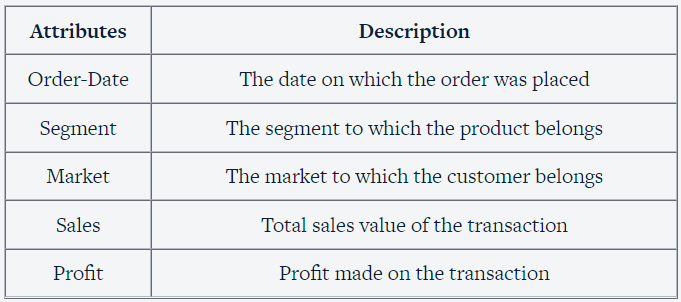

If you check the entries in the dataset, you will see that the store caters to 7 different geographical market segments and 3 major customer segments, i.e. consumer, corporate and home as can be seen in the table below.

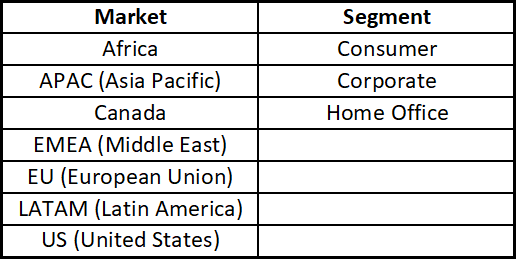

Based on these, there are 21 unique "Market-Segments" for which the sales forecasts can be made. That is the dataset needs to be prepared such that you get the Order-Date, Sales and Profit for the 21 market segments.

Now, due to certain unpredictable circumstances in the market, as a company, you are prioritizing only the best and most consistent market segment in terms of profitability. You want to see which market segment is the most consistently profitable. And then, you want to forecast the sales for that most consistently profitable market-segment only. This way you know that the market region your company is investing in will be beneficial for the company as the forecasts will be reliable. As of now, you do not want to focus on other market segments that might have not been very consistent and profitable to your company.

So, not all of these 21 market segments are important from the store’s point of view. You need to find out the most consistently profitable market-segment from the above and forecast the sales and demand for that single market-segment only and not for all.
 
Now the question is how do you find that most profitable market segment from the 21 market segments?

####How to find the most profitable market segment?

By now, it’s clear that you only need to work on one market-segment which is the most consistently profitable. To find the most consistently profitable market-segment you will be using a measure called "Coefficient of Variation (CoV)". The coefficient of variation or CoV is nothing but the ratio of the standard deviation to mean for the data that it is being calculated for.

 

But why consider the coefficient of variation here and not the standard deviation for measuring how much variation is present in the data for each of the 21 market segments? and how will the coefficient of variation lead you to the most profitable market segment for which eventually you will want to forecast the sales?

 

The coefficient of variation is a ratio of the standard deviation to mean. Once you have prepared the data such that you have the Order-Date, Sales and Profit against each of the 21 market segments, and not in the manner as it was in the initial dataset, you can check the standard deviation and the mean calculated on profit for all the 21 market segments and compare. You will find that these values vary a lot and hence it is meaningless to compare the 21 market segment's profits based on the standard deviation and their mean.

 

Actually, standard deviations are meaningless to compare different datasets as you would see for these 21 market-segments as well. As a better metric to compare the variance between the segments you use the coefficient of variation which will normalise the standard deviation with the mean and give you a comparative figure on the basis of which you can identify the most profitable market segment.

 

As a part of this assignment, you will find the coefficient of variations for all these 21 market segments and list them in a table and compare them.

 

Now, it is for you to reason out whether the most profitable market segment should have the least value of CoV or the highest value of CoV. However, please note that as a Sales manager you want to forecast the sales where the market segment is reliable or in other words, there is less variation in the profits.
 

You can read more about coefficient of variation [here](https://365datascience.com/tutorials/statistics-tutorials/coefficient-variation-variance-standard-deviation/).

####Data understanding and preparation

Now let's begin the actual work. You have seen that the data had 5 attributes. These are Order-Date, Market, Segment, Sales, and Profit for each transaction. The complete data dictionary has been given below again for your reference. The “Market” attribute has 7-factor levels representing the geographical market sector that the customer belongs to. The “Segment” attribute tells which of the 3 segments that customer belongs to. 

 

For doing the data preparation —

1. Find the 21 unique Market Segments by combining the respective 7 geographical markets for each of 3 segments such as Home office, Consumer and Corporate.
2. Your dataset after the above step should have Order-Date, Sales, Profit against each market segment such as APAC-Consumer, APAC-Home Office and so on.
3. Once you have understood the dataset of the global data store, you need to get the order date in the required month-year format to make it a monthly aggregated transaction data. For this, convert the order-date into a date-time format for getting it into the Month-year format; you will get the data for 48 months now.
4. After the above step, perform the train-test split such that you take the 42 months as the train data and the 6 months as the test data.
Calculate the CoV on the profit for each of the 21 market segments on the train data.
Find the most profitable market segment by comparing the 21 CoV values.
 

Once you have understood the dataset of the global data store, you need to get the order date in the required month-year format to make it a monthly aggregated transaction data. Then, you need to concatenate the market and segment columns such that you get the time series data consisting of order, sales, profit, market segment. The perform the train-test split for the such that you take the 42 months as train data and the 6 months as the test data.

 

For each of the 21 unique market segments, then calculate the coefficient of variation on the respective profits and compare the CoVs. Conclude the most profitable market segment based on the CoV value. It is expected that you do some research on understanding CoV and how to find it out for all the given market segments in Python.
 

NOTE: Till now, you have done only the data preparation part, in the next segment, you will understand the other part of the problem statement, that is to forecast the SALES for the most profitable market segment.

================XX================ Problem Statement Ends ===========================XX===========

##**2. Data Reading, Preparation, Combining, CoV and futher Analysis**

###2.1. Importing the Libraries

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

###2.2. Reading and Understanding the dataset


In [2]:
#Reading the dataset
store_data = pd.read_csv("Global+Superstore+Data.csv")

In [3]:
#Understanding the Dataset
store_data.head()

,Order Date,Segment,Market,Sales,Profit
0,31-07-2012,Consumer,US,2309.650,762.1845
1,05-02-2013,Corporate,APAC,3709.395,-288.7650
2,17-10-2013,Consumer,APAC,5175.171,919.9710
3,28-01-2013,Home Office,EU,2892.510,-96.5400
4,05-11-2013,Consumer,Africa,2832.960,311.5200


In [4]:
#Checking shape of the dataset
store_data.shape

(51290, 5)

In [5]:
#Checking info of the dataset
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  51290 non-null  object 
 1   Segment     51290 non-null  object 
 2   Market      51290 non-null  object 
 3   Sales       51290 non-null  float64
 4   Profit      51290 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.0+ MB


In [6]:
#Checking for any null values
store_data.isnull().sum()

Order Date    0
Segment       0
Market        0
Sales         0
Profit        0
dtype: int64

In [7]:
#Checking for any NA values
store_data.isna().sum()

Order Date    0
Segment       0
Market        0
Sales         0
Profit        0
dtype: int64

###2.3. Data Preparation
**`Note: Here after "Region" would mean "Market" + "Segment" i.e., APAC-Consumer`**

In [8]:
#Combining Sales and Market column as "Region" to get unique 21 'Market+Segment' categories
store_data['Region'] = store_data['Market'] + "-" + store_data['Segment']

In [9]:
#Dropping original Market and Segment columns
store_data.drop(columns = ['Market', 'Segment'], inplace = True)

In [10]:
#Converting  Order Date from Date time format to Month Year Format
store_data['Order Date'] = pd.to_datetime(store_data['Order Date'], format = '%d-%m-%Y').dt.to_period('M')

In [11]:
store_data.head()

,Order Date,Sales,Profit,Region
0,2012-07,2309.650,762.1845,US-Consumer
1,2013-02,3709.395,-288.7650,APAC-Corporate
2,2013-10,5175.171,919.9710,APAC-Consumer
3,2013-01,2892.510,-96.5400,EU-Home Office
4,2013-11,2832.960,311.5200,Africa-Consumer


**Looking at few plots for sales and profit against "Region"**

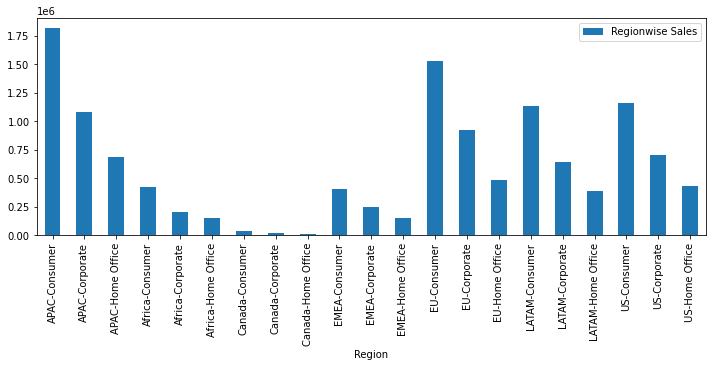

In [12]:
#Plotting sales against each region
plt.figure(figsize = [12,4])
regionwise_profit = store_data.groupby(by='Region')['Sales'].sum()
regionwise_profit.plot.bar(label = 'Regionwise Sales')
plt.legend(loc = 'best')
plt.show()

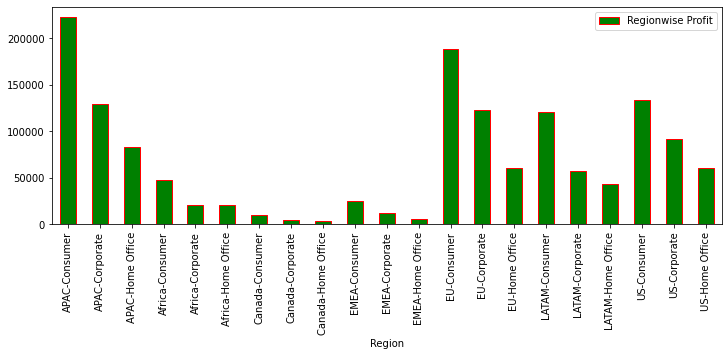

In [13]:
#Plotting profit against each region
plt.figure(figsize = [12,4])
region_sales = store_data.groupby(by='Region')['Profit'].sum()
region_sales.plot.bar(label = 'Regionwise Profit', color = 'g', edgecolor = 'r')
plt.legend(loc = 'best')
plt.show()

###2.4. Creating Pivot table as per unique region with total profit against month-year

In [14]:
#Creating a pivot table of total profit per region wise and order date
segmentwise_sales = store_data.pivot_table(index='Order Date', values = 'Profit', columns = 'Region', aggfunc = 'sum')
segmentwise_sales.head()

Region,APAC-Consumer,APAC-Corporate,APAC-Home Office,Africa-Consumer,Africa-Corporate,Africa-Home Office,Canada-Consumer,Canada-Corporate,Canada-Home Office,EMEA-Consumer,...,EMEA-Home Office,EU-Consumer,EU-Corporate,EU-Home Office,LATAM-Consumer,LATAM-Corporate,LATAM-Home Office,US-Consumer,US-Corporate,US-Home Office
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-01,991.2825,11.5998,86.4423,475.683,219.096,856.710,3.12,5.7,NaN,-2099.364,...,116.400,-845.8290,501.9315,975.360,1976.98976,1150.88400,-106.48800,762.8067,300.9145,1383.0499
2011-02,1338.8688,4358.8254,-417.4128,1441.926,-490.551,820.302,23.31,NaN,87.99,267.060,...,216.690,-1808.1180,2988.4065,-181.041,902.37752,721.25420,300.19936,500.2865,307.2995,58.1420
2011-03,3747.1632,1213.3386,923.7492,322.140,-586.716,67.320,335.55,NaN,84.03,1598.718,...,78.972,2480.5410,736.9890,503.223,2585.17924,39.07512,285.46400,597.2773,333.0515,-431.5989
2011-04,3846.4746,71.0265,657.1080,292.122,776.691,500.136,55.08,NaN,NaN,-300.879,...,-420.090,2496.6405,1056.1785,63.858,387.72148,259.25600,-421.73440,1155.0757,1393.3828,940.3767
2011-05,3639.9423,2534.1672,-272.1717,110.004,241.338,34.926,77.97,NaN,NaN,568.302,...,262.968,254.0805,1586.2740,201.102,1002.34724,-531.74444,-240.11600,698.9171,2063.5013,-23.7088


In [15]:
#Checking shape of new pivoted dataframe
segmentwise_sales.shape

(48, 21)

In [16]:
#Checking columns of new pivoted dataframe
segmentwise_sales.columns

Index(['APAC-Consumer', 'APAC-Corporate', 'APAC-Home Office',
       'Africa-Consumer', 'Africa-Corporate', 'Africa-Home Office',
       'Canada-Consumer', 'Canada-Corporate', 'Canada-Home Office',
       'EMEA-Consumer', 'EMEA-Corporate', 'EMEA-Home Office', 'EU-Consumer',
       'EU-Corporate', 'EU-Home Office', 'LATAM-Consumer', 'LATAM-Corporate',
       'LATAM-Home Office', 'US-Consumer', 'US-Corporate', 'US-Home Office'],
      dtype='object', name='Region')

In [17]:
#Checking info new pivoted dataframe
segmentwise_sales.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 48 entries, 2011-01 to 2014-12
Freq: M
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   APAC-Consumer       48 non-null     float64
 1   APAC-Corporate      48 non-null     float64
 2   APAC-Home Office    48 non-null     float64
 3   Africa-Consumer     48 non-null     float64
 4   Africa-Corporate    48 non-null     float64
 5   Africa-Home Office  48 non-null     float64
 6   Canada-Consumer     42 non-null     float64
 7   Canada-Corporate    34 non-null     float64
 8   Canada-Home Office  25 non-null     float64
 9   EMEA-Consumer       48 non-null     float64
 10  EMEA-Corporate      48 non-null     float64
 11  EMEA-Home Office    48 non-null     float64
 12  EU-Consumer         48 non-null     float64
 13  EU-Corporate        48 non-null     float64
 14  EU-Home Office      48 non-null     float64
 15  LATAM-Consumer      48 non-null     flo

###2.5. Splitting the data into Train & Test data

In [18]:
#Defining the train size as per problem statement (42 months as train data)
train_size = 42
sales_train = segmentwise_sales[:train_size]
sales_test = segmentwise_sales[train_size:]

In [19]:
#Checking the shape of train & test dataset

print(f'Train Data Size {sales_train.shape}')
print('\n')
print(f'Test Data Size {sales_test.shape}')

Train Data Size (42, 21)


Test Data Size (6, 21)


###2.6. Calculating Coefficient of Variance (CoV)

The coefficient of variation (CoV) is a relative measure of variability that indicates the size of a standard deviation in relation to its mean. It is a standardized, unitless measure that allows you to compare variability between disparate groups and characteristics.

**The lower the value of the coefficient of variation, the more precise the foreast/estimate**

In [20]:
#Defining an empty Dataframe with 'CoV' Name
CoV = pd.DataFrame(columns = ['Segment', 'CoV'])

In [21]:
#Using loop for calculating CoV in new dataframe
for i in segmentwise_sales.columns:
  data = {'Segment': i, 'CoV': np.std(sales_train[i])/np.mean(sales_train[i])}
  CoV = CoV.append(data, ignore_index= True)

In [22]:
#Sorting the values in CoV dataframe in ascending order by CoV
CoV.sort_values(by='CoV', ascending = True)

,Segment,CoV
0,APAC-Consumer,0.596404
12,EU-Consumer,0.647485
15,LATAM-Consumer,0.680684
13,EU-Corporate,0.689346
1,APAC-Corporate,0.731926
16,LATAM-Corporate,0.880260
19,US-Corporate,1.027209
2,APAC-Home Office,1.048817
18,US-Consumer,1.095295
14,EU-Home Office,1.114681


<Figure size 432x288 with 0 Axes>

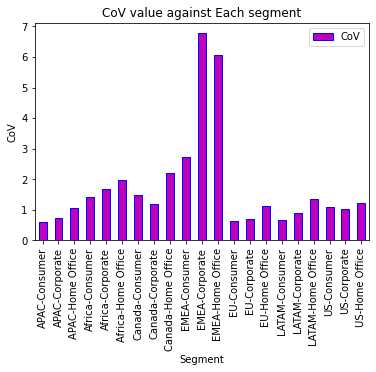

In [23]:
#Plotting Barplot for CoV values
plt.figure()
CoV.plot.bar(x = 'Segment', y = 'CoV', color = 'm', edgecolor = 'b')
plt.title('CoV value against Each segment')
plt.ylabel('CoV')
plt.show()

As we know from the Coefficient of Variation (CoV) definition above, we know that lower the value of the coefficient of variation, the more precise the forecasting will be. 

Now as a Manager, i would like to invest or focus on the "Region" having less variability (less CoV) in terms of sales. As it has high probability of getting correct or close to correct forecast of sales for next 6 months.

Here is our case we have the least CoV for "APAC-Consumer" Region and therefore we would proceed ahead with this Region only for further analysis and Forecasting.

###2.7. Creating a New Dataframe which only contains data of "APAC-Consumer" Region only

In [24]:
segmentwise_sales

Region,APAC-Consumer,APAC-Corporate,APAC-Home Office,Africa-Consumer,Africa-Corporate,Africa-Home Office,Canada-Consumer,Canada-Corporate,Canada-Home Office,EMEA-Consumer,...,EMEA-Home Office,EU-Consumer,EU-Corporate,EU-Home Office,LATAM-Consumer,LATAM-Corporate,LATAM-Home Office,US-Consumer,US-Corporate,US-Home Office
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-01,991.2825,11.5998,86.4423,475.683,219.096,856.710,3.12,5.70,NaN,-2099.364,...,116.400,-845.8290,501.9315,975.3600,1976.98976,1150.88400,-106.48800,762.8067,300.9145,1383.0499
2011-02,1338.8688,4358.8254,-417.4128,1441.926,-490.551,820.302,23.31,NaN,87.99,267.060,...,216.690,-1808.1180,2988.4065,-181.0410,902.37752,721.25420,300.19936,500.2865,307.2995,58.1420
2011-03,3747.1632,1213.3386,923.7492,322.140,-586.716,67.320,335.55,NaN,84.03,1598.718,...,78.972,2480.5410,736.9890,503.2230,2585.17924,39.07512,285.46400,597.2773,333.0515,-431.5989
2011-04,3846.4746,71.0265,657.1080,292.122,776.691,500.136,55.08,NaN,NaN,-300.879,...,-420.090,2496.6405,1056.1785,63.8580,387.72148,259.25600,-421.73440,1155.0757,1393.3828,940.3767
2011-05,3639.9423,2534.1672,-272.1717,110.004,241.338,34.926,77.97,NaN,NaN,568.302,...,262.968,254.0805,1586.2740,201.1020,1002.34724,-531.74444,-240.11600,698.9171,2063.5013,-23.7088
2011-06,4328.2596,1435.8294,3452.1018,-1290.639,-259.218,-774.801,7.50,40.08,23.40,-267.030,...,-2371.776,4317.4515,2270.8170,1210.2930,1039.27972,2558.46696,643.69764,3486.7664,67.0149,1422.7431
2011-07,1258.9617,525.4647,-42.0498,621.168,134.847,-506.562,47.28,528.33,8.40,-942.603,...,-150.114,760.6920,916.9500,418.9350,1906.45620,303.29032,363.28400,-2227.2786,1308.7058,77.0902
2011-08,775.8066,4070.5581,775.7616,232.917,915.885,1090.200,43.68,29.70,NaN,285.270,...,183.276,5498.6715,1626.2670,184.6140,1946.89372,180.54028,661.66792,2157.7522,2245.4838,914.8690
2011-09,5181.4449,1952.4675,623.3595,-86.163,950.766,1345.740,134.01,10.17,NaN,1012.101,...,1151.358,5921.8785,5390.6625,2492.9010,1632.48620,386.77900,179.39744,8312.1203,-948.1010,964.0801


In [25]:
#Creating new dataframe with only 'APAC-Consumer' region
apac = store_data[store_data['Region']=='APAC-Consumer']

In [26]:
#Looking at value counts of order dates
apac['Order Date'].value_counts()

2014-11    233
2014-12    226
2014-08    225
2014-10    217
2014-06    184
2013-06    179
2013-05    177
2014-09    174
2013-09    170
2014-05    167
2012-11    165
2013-11    164
2013-12    160
2012-10    144
2011-12    144
2012-06    143
2013-08    139
2012-08    135
2013-10    135
2011-11    133
2012-12    122
2014-04    111
2011-10    111
2012-05    110
2014-01    109
2011-09    109
2012-09    106
2014-07    104
2014-03    103
2013-01     90
2013-07     89
2011-06     88
2014-02     86
2011-08     86
2012-01     84
2013-03     79
2011-03     74
2012-02     73
2013-04     71
2013-02     71
2012-04     68
2011-05     65
2011-01     58
2011-07     53
2012-03     49
2012-07     41
2011-02     38
2011-04     37
Freq: M, Name: Order Date, dtype: int64

In [27]:
#As we can see that in same date there are multiple orders, so we will group our data by 'Order Date'
sales_apac = apac.groupby(by='Order Date').sum()
sales_apac = sales_apac

Since we need to forecast for "Sales" only, so we can drop "Profit" column now from this new dataframe

In [28]:
#Dropping "Profit" column 
sales_apac.drop(columns = 'Profit', inplace = True)

In [29]:
#setting index as timestamp
sales_apac.index = sales_apac.index.to_timestamp()

In [30]:
#Rounding off sales values to 2 decimal points
sales_apac = sales_apac.round(2)

####2.7.1. Plotting the Original time series for "Sales" against "Order Date" for understanding

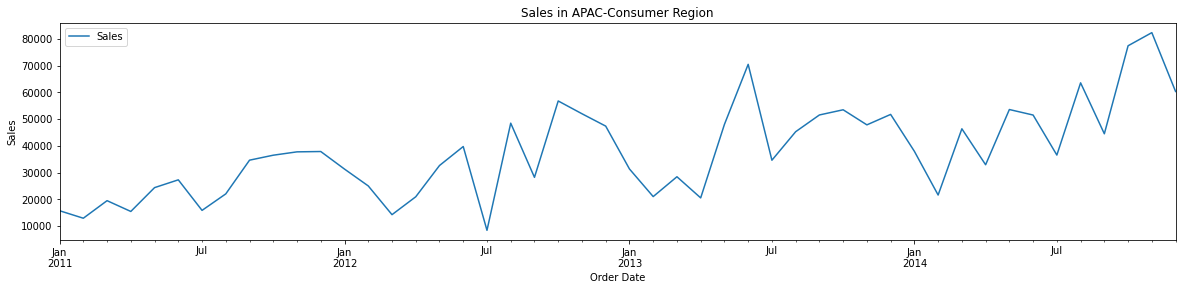

In [31]:
sales_apac.plot(figsize = (20,4))
plt.legend(loc='best')
plt.title("Sales in APAC-Consumer Region")
plt.ylabel('Sales')
plt.show()

###2.8. Decomposing the Time Series 

In [32]:
#Importing libaries
from pylab import rcParams
import statsmodels.api as sm
import matplotlib.pyplot as plt

####2.8.1 Additive Decomposition

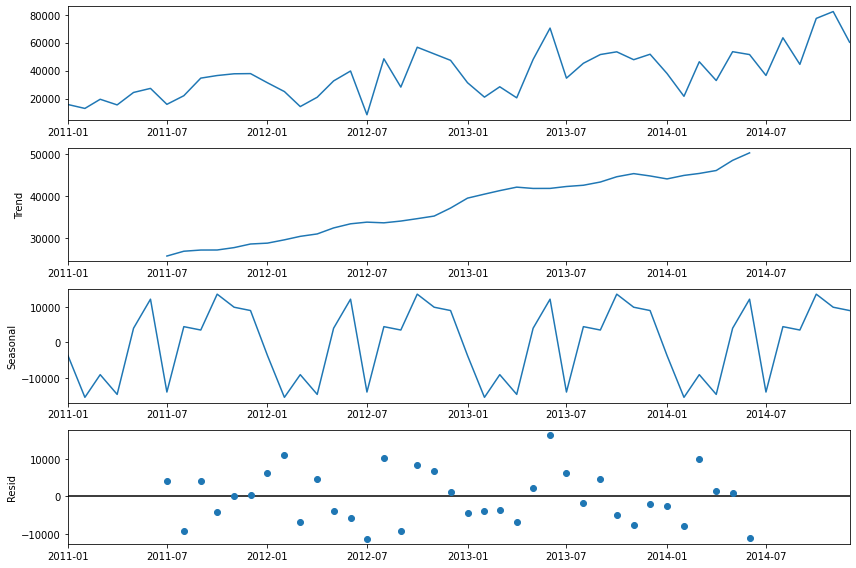

In [33]:
rcParams['figure.figsize'] = 12, 8
additive_decomp = sm.tsa.seasonal_decompose(sales_apac, model = 'additive', freq = 12)
additive_decomp.plot()
plt.show()

####2.8.2 Multiplicative Decomposition

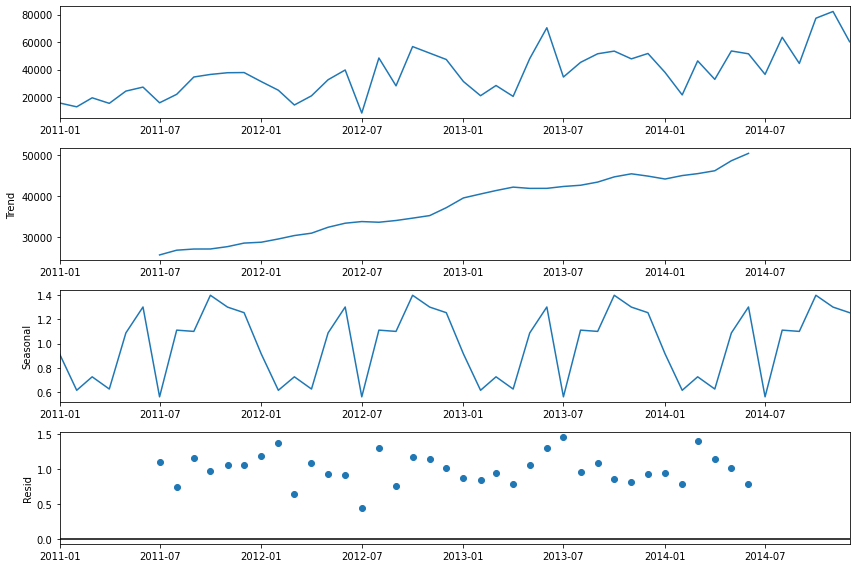

In [34]:
rcParams['figure.figsize'] = 12,8
mutliplicative_decomp = sm.tsa.seasonal_decompose(sales_apac, model = 'multiplicative', freq = 12)
mutliplicative_decomp.plot()
plt.show()

By looking at the decomposition plots above, we are sure that time series contains seasonality. 

We know from the module study that when there is seasonality present in time series, the Holt's Winter Method from smoothing technique and SARIMAX model fro Auto Regressive techniques would provide the best forecast. 

However, as explained in problem statement, we would try to apply all the smoothing and AR techniques for better understand and pratice.

###2.9. Peforming Train-Test split on new dataframe with "APAC-Consumer" Region Sales Data only

In [35]:
##Defining the train size as per problem statement (42 months as train data)
train_size = 42
sales_apac_train = sales_apac[:train_size]
sales_apac_test = sales_apac[train_size:]

In [36]:
#Checking the shape of train & test dataset

print(f'Train Data Size {sales_apac_train.shape}')
print('\n')
print(f'Test Data Size {sales_apac_test.shape}')

Train Data Size (42, 1)


Test Data Size (6, 1)


##**3. Building Models for Forecasting**

###**3.1. Naive, and Averaging Methods**

####3.1.1. NAIVE Method

In [37]:
#Forecasting using 'NAIVE' method
forecast_naive = sales_apac_test.copy()
forecast_naive['Naive Forecast'] = sales_apac_train['Sales'][train_size-1]
forecast_naive.tail()

,Sales,Naive Forecast
Order Date,,
2014-08-01,63521.77,51483.7
2014-09-01,44477.27,51483.7
2014-10-01,77379.83,51483.7
2014-11-01,82286.36,51483.7
2014-12-01,60292.13,51483.7


#####Plot train, test and forecast

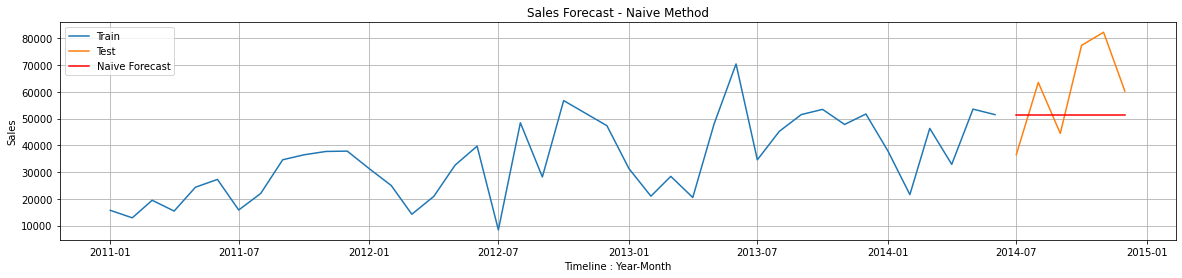

In [38]:
#Plotting the Naive Forecast with Train & Test data
plt.figure(figsize=(20,4))
plt.plot(sales_apac_train, label='Train')
plt.plot(sales_apac_test, label='Test')
plt.plot(forecast_naive['Naive Forecast'], label = 'Naive Forecast', c = 'r')
plt.title('Sales Forecast - Naive Method')
plt.xlabel('Timeline : Year-Month')
plt.ylabel('Sales')
plt.legend(loc = 'best')
plt.grid()
plt.show()

#####Calculate RMSE and MAPE

In [39]:
#Calculating RMSE & MAPE of the Naive Forecast method
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(sales_apac_test, forecast_naive['Naive Forecast'])).round(2)
mape = np.round(np.mean(np.abs(sales_apac_test['Sales'] - forecast_naive['Naive Forecast'])/sales_apac_test['Sales'])*100,2)

results = pd.DataFrame({'Method': 'Naive Method', 'RMSE':[rmse], 'MAPE':[mape]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive Method,18774.05,26.86


####3.1.2. Simple Average Method

In [40]:
#Forecasting using 'Simple Average' method
forecast_sa = sales_apac_test.copy()
forecast_sa['Simple Average Method Forecast'] = sales_apac_train['Sales'].mean()
forecast_sa

,Sales,Simple Average Method Forecast
Order Date,,
2014-07-01,36524.30,34577.905
2014-08-01,63521.77,34577.905
2014-09-01,44477.27,34577.905
2014-10-01,77379.83,34577.905
2014-11-01,82286.36,34577.905
2014-12-01,60292.13,34577.905


#####Plot train, test and forecast

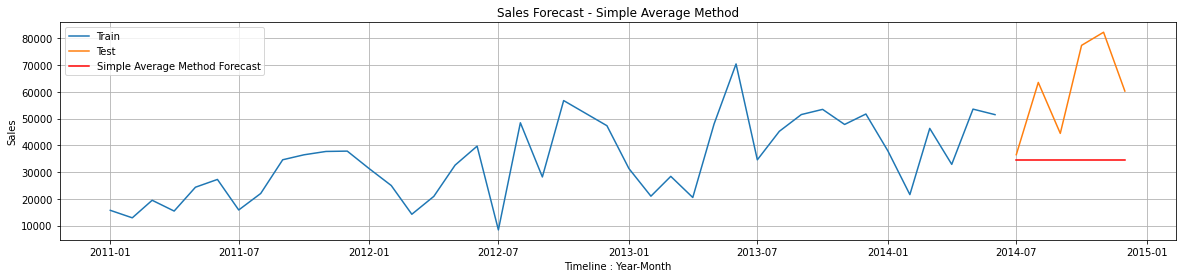

In [41]:
#Plotting the Simple Average Method Forecast with Train & Test data
plt.figure(figsize=(20,4))
plt.plot(sales_apac_train, label='Train')
plt.plot(sales_apac_test, label='Test')
plt.plot(forecast_sa['Simple Average Method Forecast'], label = 'Simple Average Method Forecast', c = 'r')
plt.title('Sales Forecast - Simple Average Method')
plt.xlabel('Timeline : Year-Month')
plt.ylabel('Sales')
plt.legend(loc = 'best')
plt.grid()
plt.show()

#####Calculate RMSE and MAPE

In [42]:
#Calculating RMSE & MAPE of the Simple Average Forecast Method
rmse = np.sqrt(mean_squared_error(sales_apac_test, forecast_sa['Simple Average Method Forecast'])).round()
mape = np.round(np.mean(np.abs(sales_apac_test['Sales'] - forecast_sa['Simple Average Method Forecast'])/sales_apac_test['Sales'])*100,2)

updatedresults = pd.DataFrame({'Method':'Simple Average Method', 'RMSE':[rmse], 'MAPE':[mape]})
updatedresults = updatedresults[['Method', 'RMSE', 'MAPE']]
results = pd.concat([results, updatedresults])
results

,Method,RMSE,MAPE
0,Naive Method,18774.05,26.86
0,Simple Average Method,30846.00,38.18


####3.1.3. Simple Moving Average Method

In [43]:
#Forecasting using 'Simple Moving Average' method
ma_window = 2
forecast_sma = sales_apac.copy()
forecast_sma['Simple Moving Average Method Forecast'] = sales_apac_train['Sales'].rolling(ma_window).mean()
forecast_sma['Simple Moving Average Method Forecast'][train_size:] = forecast_sma['Simple Moving Average Method Forecast'][train_size-1]
forecast_sma = forecast_sma[train_size:]
forecast_sma

,Sales,Simple Moving Average Method Forecast
Order Date,,
2014-07-01,36524.30,52514.265
2014-08-01,63521.77,52514.265
2014-09-01,44477.27,52514.265
2014-10-01,77379.83,52514.265
2014-11-01,82286.36,52514.265
2014-12-01,60292.13,52514.265


#####Plot train, test and forecast

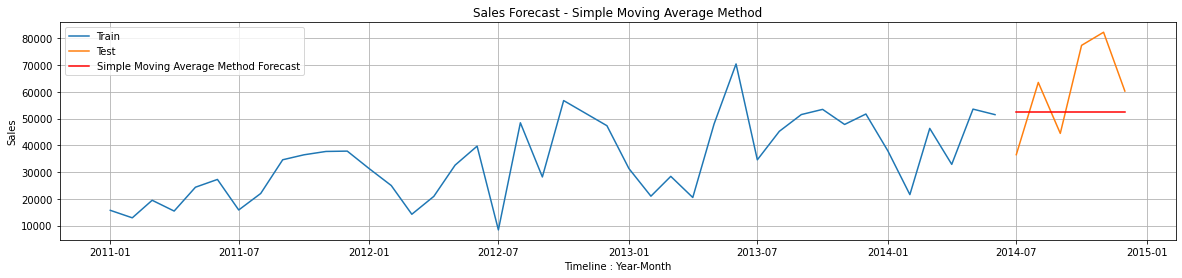

In [44]:
#Plotting the Simple Moving Average Method Forecast with Train & Test data
plt.figure(figsize=(20,4))
plt.plot(sales_apac_train, label='Train')
plt.plot(sales_apac_test, label='Test')
plt.plot(forecast_sma['Simple Moving Average Method Forecast'], label = 'Simple Moving Average Method Forecast', c = 'r')
plt.title('Sales Forecast - Simple Moving Average Method')
plt.xlabel('Timeline : Year-Month')
plt.ylabel('Sales')
plt.legend(loc = 'best')
plt.grid()
plt.show()

#####Calculate RMSE and MAPE

In [45]:
#Calculating RMSE & MAPE of the Simple Moving Average Forecast Method
rmse = np.sqrt(mean_squared_error(sales_apac_test, forecast_sma['Simple Moving Average Method Forecast'])).round()
mape = np.round(np.mean(np.abs(sales_apac_test['Sales'] - forecast_sma['Simple Moving Average Method Forecast'])/sales_apac_test['Sales'])*100,2)

updatedresults = pd.DataFrame({'Method':'Simple Average Method', 'RMSE':[rmse], 'MAPE':[mape]})
updatedresults = updatedresults[['Method', 'RMSE', 'MAPE']]
results = pd.concat([results, updatedresults])
results

,Method,RMSE,MAPE
0,Naive Method,18774.05,26.86
0,Simple Average Method,30846.00,38.18
0,Simple Average Method,18288.00,26.73


We have seen from above methods that we are not getting the forecast as expected. As we learnt that above methods are good when we have less than 10 historical data points. However, in our case we have 42 data points and we know that our data also contains seasoality. Therefore, we would be using smoothing techinques for forecasting the sales for next 6 months

###**3.2. Smoothing Techniques**

####3.2.1. Simple Exponential Smoothing

In [46]:
#Forecasting using 'Simple Exponential' smoothing method
from statsmodels.tsa.holtwinters import SimpleExpSmoothing as SES
model = SES(sales_apac_train['Sales'])
model_fit = model.fit(optimized = True)
print('='*180)
print(f'Model Parameters: \n {model_fit.params}')
print('='*180)

forecast_ses = sales_apac_test.copy()
forecast_ses['Simple Exponential Smoothing Method Forecast'] = model_fit.forecast(len(sales_apac_test))
forecast_ses

Model Parameters: 
 {'smoothing_level': 0.23523255813953486, 'smoothing_trend': nan, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 15711.71, 'initial_trend': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


,Sales,Simple Exponential Smoothing Method Forecast
Order Date,,
2014-07-01,36524.30,44799.96788
2014-08-01,63521.77,44799.96788
2014-09-01,44477.27,44799.96788
2014-10-01,77379.83,44799.96788
2014-11-01,82286.36,44799.96788
2014-12-01,60292.13,44799.96788


#####Plot train, test and forecast

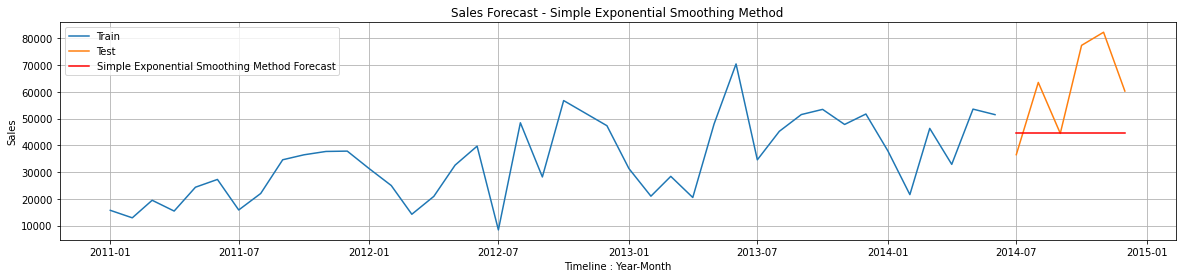

In [47]:
#Plotting the Simple Exponential Smoothing Method Forecast with Train & Test data
plt.figure(figsize=(20,4))
plt.plot(sales_apac_train, label='Train')
plt.plot(sales_apac_test, label='Test')
plt.plot(forecast_ses['Simple Exponential Smoothing Method Forecast'], label = 'Simple Exponential Smoothing Method Forecast', c = 'r')
plt.title('Sales Forecast - Simple Exponential Smoothing Method')
plt.xlabel('Timeline : Year-Month')
plt.ylabel('Sales')
plt.legend(loc = 'best')
plt.grid()
plt.show()

#####Calculate RMSE and MAPE

In [48]:
#Calculating RMSE & MAPE of the Simple Exponential Smoothing Method
rmse = np.sqrt(mean_squared_error(sales_apac_test, forecast_ses['Simple Exponential Smoothing Method Forecast'])).round()
mape = np.round(np.mean(np.abs(sales_apac_test['Sales'] - forecast_ses['Simple Exponential Smoothing Method Forecast'])/sales_apac_test['Sales'])*100,2)

updatedresults = pd.DataFrame({'Method':'Simple Exponential Smoothing Method', 'RMSE':[rmse], 'MAPE':[mape]})
updatedresults = updatedresults[['Method', 'RMSE', 'MAPE']]
results = pd.concat([results, updatedresults])
results

,Method,RMSE,MAPE
0,Naive Method,18774.05,26.86
0,Simple Average Method,30846.00,38.18
0,Simple Average Method,18288.00,26.73
0,Simple Exponential Smoothing Method,22825.00,27.70


####3.2.2. Holt's Method (with Trend)

In [49]:
#Forecasting using Holt's Exponential Smoothing method
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HES
model = HES(np.asarray(sales_apac_train['Sales']), seasonal_periods = 12, trend = 'additive', seasonal = None)
model_fit = model.fit(optimized = True)
print('='*180)
print(f'Model Parameters: \n {model_fit.params}')
print('='*180)
forecast_hes = sales_apac_test.copy()
forecast_hes['Holt\'s Exponential Smoothing Method Forecast'] = model_fit.forecast(len(sales_apac_test))
forecast_hes

Model Parameters: 
 {'smoothing_level': 0.45285714285714285, 'smoothing_trend': 0.0646938775510204, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 15711.71, 'initial_trend': -2800.8499999999985, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


,Sales,Holt's Exponential Smoothing Method Forecast
Order Date,,
2014-07-01,36524.30,48163.714156
2014-08-01,63521.77,48655.493656
2014-09-01,44477.27,49147.273156
2014-10-01,77379.83,49639.052655
2014-11-01,82286.36,50130.832155
2014-12-01,60292.13,50622.611654


#####Plot train, test and forecast

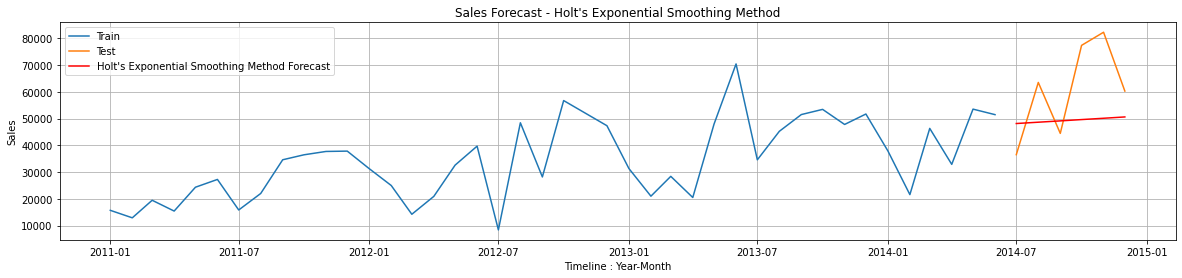

In [50]:
#Plotting the Holt's Exponential Smoothing Method Forecast with Train & Test data
plt.figure(figsize=(20,4))
plt.plot(sales_apac_train, label='Train')
plt.plot(sales_apac_test, label='Test')
plt.plot(forecast_hes['Holt\'s Exponential Smoothing Method Forecast'], label = 'Holt\'s Exponential Smoothing Method Forecast', c = 'r')
plt.title('Sales Forecast - Holt\'s Exponential Smoothing Method')
plt.xlabel('Timeline : Year-Month')
plt.ylabel('Sales')
plt.legend(loc = 'best')
plt.grid()
plt.show()

#####Calculate RMSE and MAPE

In [51]:
#Calculating RMSE & MAPE of the Holt's Exponential Smoothing Method
rmse = np.sqrt(mean_squared_error(sales_apac_test, forecast_hes['Holt\'s Exponential Smoothing Method Forecast'])).round()
mape = np.round(np.mean(np.abs(sales_apac_test['Sales'] - forecast_hes['Holt\'s Exponential Smoothing Method Forecast'])/sales_apac_test['Sales'])*100,2)

updatedresults = pd.DataFrame({'Method':'Holt\'s Exponential Smoothing Method', 'RMSE':[rmse], 'MAPE':[mape]})
updatedresults = updatedresults[['Method', 'RMSE', 'MAPE']]
results = pd.concat([results, updatedresults])
results

,Method,RMSE,MAPE
0,Naive Method,18774.05,26.86
0,Simple Average Method,30846.00,38.18
0,Simple Average Method,18288.00,26.73
0,Simple Exponential Smoothing Method,22825.00,27.70
0,Holt's Exponential Smoothing Method,19474.00,26.12


####3.2.3. Holt's Winters Method (Additive)

In [52]:
#Forecasting using Holt's Winters (Additive) Exponential Smoothing method
forecast_hwes = sales_apac_test.copy()
model = HES(np.asarray(sales_apac_train['Sales']), seasonal_periods = 12, trend = 'add', seasonal = 'add')
model_fit = model.fit(optimized = True)
print('='*180)
print(f'Model Parameters: \n {model_fit.params}')
print('='*180)
forecast_hwes['Holt\'s Winters Exponential Smoothing Method Forecast'] = model_fit.forecast(len(sales_apac_test))
forecast_hwes

Model Parameters: 
 {'smoothing_level': 0.040357142857142855, 'smoothing_trend': 0.040357142857142855, 'smoothing_seasonal': 0.13709183673469388, 'damping_trend': nan, 'initial_level': 29061.29, 'initial_trend': 730.4168055555556, 'initial_seasons': array([-13349.58, -16150.43,  -9588.73, -13620.99,  -4712.32,  -1801.27,
       -13218.46,  -7049.05,   5551.89,   7410.76,   8661.31,   8785.7 ]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


,Sales,Holt's Winters Exponential Smoothing Method Forecast
Order Date,,
2014-07-01,36524.30,38350.337912
2014-08-01,63521.77,49604.620466
2014-09-01,44477.27,57753.173487
2014-10-01,77379.83,63265.197342
2014-11-01,82286.36,63241.059407
2014-12-01,60292.13,63777.583290


#####Plot train, test and forecast

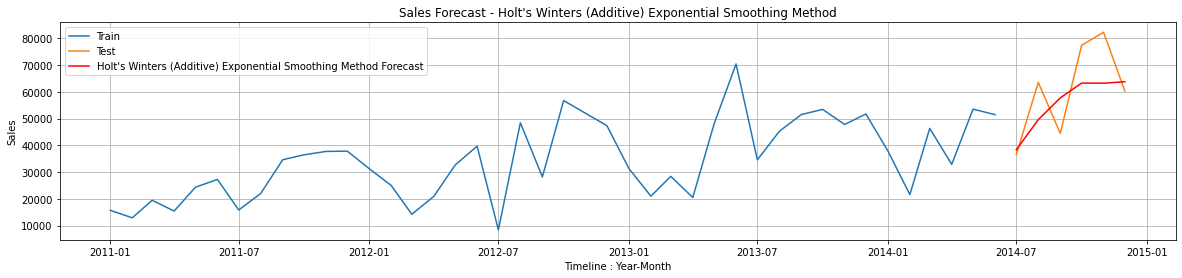

In [53]:
#Plotting the Holt's Winters (Additive) Exponential Smoothing Method Forecast with Train & Test data
plt.figure(figsize=(20,4))
plt.plot(sales_apac_train, label='Train')
plt.plot(sales_apac_test, label='Test')
plt.plot(forecast_hwes['Holt\'s Winters Exponential Smoothing Method Forecast'], label = 'Holt\'s Winters (Additive) Exponential Smoothing Method Forecast', c = 'r')
plt.title('Sales Forecast - Holt\'s Winters (Additive) Exponential Smoothing Method')
plt.xlabel('Timeline : Year-Month')
plt.ylabel('Sales')
plt.legend(loc = 'best')
plt.grid()
plt.show()

#####Calculate RMSE and MAPE

In [54]:
#Calculating RMSE & MAPE of the Holt's Winters (Additive) Exponential Smoothing Method
rmse = np.sqrt(mean_squared_error(sales_apac_test, forecast_hwes['Holt\'s Winters Exponential Smoothing Method Forecast'])).round()
mape = np.round(np.mean(np.abs(sales_apac_test['Sales'] - forecast_hwes['Holt\'s Winters Exponential Smoothing Method Forecast'])/sales_apac_test['Sales'])*100,2)

updatedresults = pd.DataFrame({'Method':'Holt\'s Winters (Additive) Exponential Smoothing Method', 'RMSE':[rmse], 'MAPE':[mape]})
updatedresults = updatedresults[['Method', 'RMSE', 'MAPE']]
results = pd.concat([results, updatedresults])
results

,Method,RMSE,MAPE
0,Naive Method,18774.05,26.86
0,Simple Average Method,30846.00,38.18
0,Simple Average Method,18288.00,26.73
0,Simple Exponential Smoothing Method,22825.00,27.70
0,Holt's Exponential Smoothing Method,19474.00,26.12
0,Holt's Winters (Additive) Exponential Smoothin...,12566.00,17.32


####3.2.4. Holt's Winters Method (Multiplicative)

In [55]:
#Forecasting using Holt's Winters (Multiplicative) Exponential Smoothing method
forecast_hwesm = sales_apac_test.copy()
model = HES(np.asarray(sales_apac_train['Sales']), seasonal_periods = 12, trend = 'add', seasonal = 'mul')
model_fit = model.fit(optimized = True)
print('='*180)
print(f'Model Parameters: \n {model_fit.params}')
print('='*180)
forecast_hwesm['Holt\'s Winters Exponential Smoothing Method Forecast'] = model_fit.forecast(len(sales_apac_test))
forecast_hwesm

Model Parameters: 
 {'smoothing_level': 0.005, 'smoothing_trend': 0.005, 'smoothing_seasonal': 0.3198214285714286, 'damping_trend': nan, 'initial_level': 29061.29, 'initial_trend': 730.4168055555556, 'initial_seasons': array([0.54064049, 0.44426314, 0.67005147, 0.53130126, 0.8378489 ,
       0.93801824, 0.54515233, 0.75744194, 1.19104073, 1.25500451,
       1.29803598, 1.30231624]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


,Sales,Holt's Winters Exponential Smoothing Method Forecast
Order Date,,
2014-07-01,36524.30,30040.565298
2014-08-01,63521.77,51989.900177
2014-09-01,44477.27,59819.368886
2014-10-01,77379.83,71080.604774
2014-11-01,82286.36,68837.555912
2014-12-01,60292.13,69169.971708


#####Plot train, test and forecast

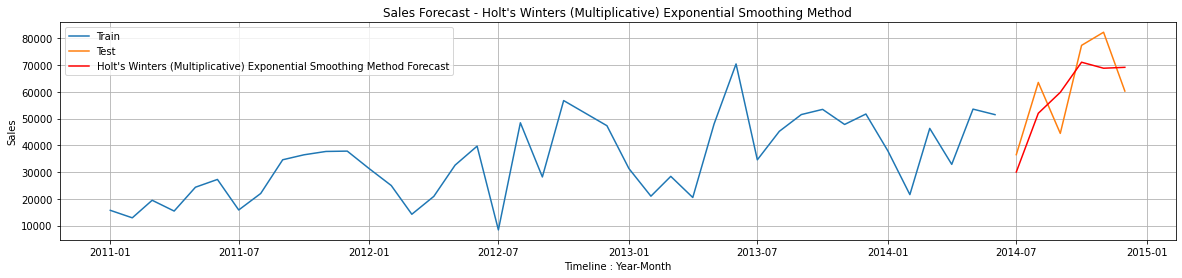

In [56]:
#Plotting the Holt's Winters (Multiplicative) Exponential Smoothing Method Forecast with Train & Test data
plt.figure(figsize=(20,4))
plt.plot(sales_apac_train, label='Train')
plt.plot(sales_apac_test, label='Test')
plt.plot(forecast_hwesm['Holt\'s Winters Exponential Smoothing Method Forecast'], label = 'Holt\'s Winters (Multiplicative) Exponential Smoothing Method Forecast', c = 'r')
plt.title('Sales Forecast - Holt\'s Winters (Multiplicative) Exponential Smoothing Method')
plt.xlabel('Timeline : Year-Month')
plt.ylabel('Sales')
plt.legend(loc = 'best')
plt.grid()
plt.show()

#####Calculate RMSE and MAPE

In [57]:
#Calculating RMSE & MAPE of the Holt's Winters (Multiplicative) Exponential Smoothing Method
rmse = np.sqrt(mean_squared_error(sales_apac_test, forecast_hwesm['Holt\'s Winters Exponential Smoothing Method Forecast'])).round()
mape = np.round(np.mean(np.abs(sales_apac_test['Sales'] - forecast_hwesm['Holt\'s Winters Exponential Smoothing Method Forecast'])/sales_apac_test['Sales'])*100,2)

updatedresults = pd.DataFrame({'Method':'Holt\'s Winters (Multiplicative) Exponential Smoothing Method', 'RMSE':[rmse], 'MAPE':[mape]})
updatedresults = updatedresults[['Method', 'RMSE', 'MAPE']]
results = pd.concat([results, updatedresults])
results

,Method,RMSE,MAPE
0,Naive Method,18774.05,26.86
0,Simple Average Method,30846.00,38.18
0,Simple Average Method,18288.00,26.73
0,Simple Exponential Smoothing Method,22825.00,27.70
0,Holt's Exponential Smoothing Method,19474.00,26.12
0,Holt's Winters (Additive) Exponential Smoothin...,12566.00,17.32
0,Holt's Winters (Multiplicative) Exponential Sm...,10876.00,18.27


###**3.3. Regression Models**

####3.3.1. Stationarity Tests

#####Kwaitkowski-Phillips-Schmidt-Shin (KPSS) Test

In [58]:
#Importing the kpss from statsmodels.tsa.stattools
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(sales_apac['Sales'])

In [59]:
#Looking at kpss test params
print('KPSS Statistic : %f' % kpss_test[0])
print('Critical Value @ 0.05 : %.2f' % kpss_test[3]['5%'])
print('p-Value : %f' % kpss_test[1])

KPSS Statistic : 0.595515
Critical Value @ 0.05 : 0.46
p-Value : 0.023044


As we can see that p-value is < 0.05 from KPSS test. Therefore, Null Hypothesis (H0) i.e., The series is stationary gets rejected, or we can say series is NOT stationary.

#####Augumented Dickey-Fuller (ADF) Test

In [60]:
#Importing the adfuller from statsmodels.tsa.stattools
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(sales_apac['Sales'])

In [61]:
#Looking at kpss test params
print('KPSS Statistic : %f' % adf_test[0])
print('Critical Value @ 0.05 : %.2f' % adf_test[4]['5%'])
print('p-Value : %f' % adf_test[1])

KPSS Statistic : -2.220857
Critical Value @ 0.05 : -2.93
p-Value : 0.198763


As we can see that p-value is > 0.05 from adf test. Therefore, Null Hypothesis (H0) i.e., The series is stationary gets rejected, or we can say series is NOT stationary.

As we found that series in NOT stationary, we will do the transforamtion of time series to make it stationary. We will perform the boxcox transformation on the series. 

####3.3.2. BoxCox Transformation

In [62]:
#Peforming Boxcox Transformation to make variance constant
from scipy.stats import boxcox
sales_boxcox = pd.Series(boxcox(sales_apac['Sales'], lmbda = 0), index = sales_apac.index)

#using lmbda = 0 as mentioned in problem statement

#####Plotting the time series after transformation

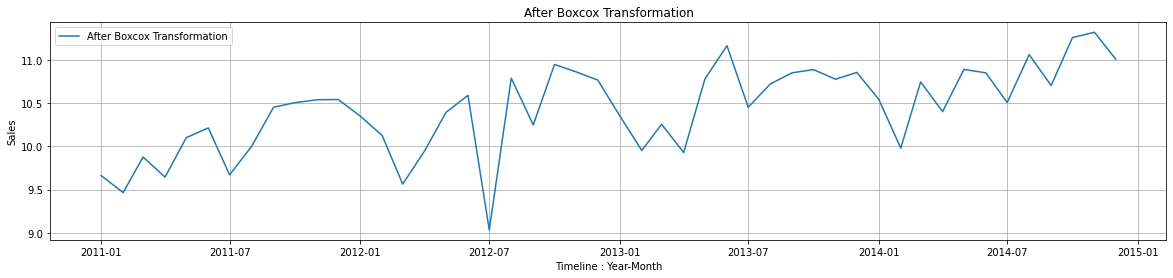

In [63]:
plt.figure(figsize=(20,4))
plt.plot(sales_boxcox, label='After Boxcox Transformation')
plt.title('After Boxcox Transformation')
plt.xlabel('Timeline : Year-Month')
plt.ylabel('Sales')
plt.legend(loc = 'best')
plt.grid()
plt.show()

####3.3.3. Differencing

In [64]:
#Peforming Differencing to make remove trend
from scipy.stats import boxcox
sales_boxcox_diff = pd.Series(sales_boxcox - sales_boxcox.shift(), index = sales_apac.index)

#####Plotting the time series after Differencing

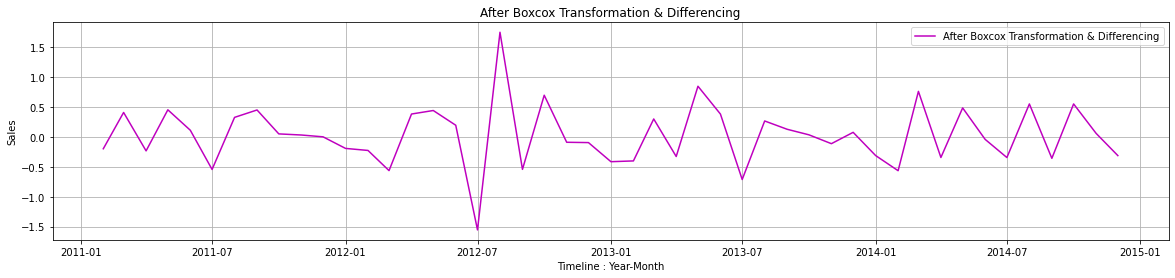

In [65]:
plt.figure(figsize=(20,4))
plt.plot(sales_boxcox_diff, label='After Boxcox Transformation & Differencing', c = 'm')
plt.title('After Boxcox Transformation & Differencing')
plt.xlabel('Timeline : Year-Month')
plt.ylabel('Sales')
plt.legend(loc = 'best')
plt.grid()
plt.show()

#####Now dropping the NA values from series after transformation and differencing

In [66]:
#Dropping NA values from series after transformation and differencing
sales_boxcox_diff.dropna(inplace = True)

#####Peforming the Train-Test Split of series after transformation and differencing

In [67]:
#Train-Test split on series after transformation only i.e., on sales_boxcox dataframe
train_size = 42
sales_boxcox_train = sales_boxcox[:train_size]
sales_boxcox_test = sales_boxcox[train_size:]

In [68]:
#Train-Test split on series after transformation & differncing both i.e., on sales_boxcox_diff dataframe
train_size = 42
sales_boxcox_diff_train = sales_boxcox_diff[:train_size]
sales_boxcox_diff_test = sales_boxcox_diff[train_size:]

###**3.4. Auto Regressive Models**

####3.4.1. Auto Regressive or Simple Auto Regressive model(AR)

In [69]:
#Importing the ARIMA model from statsmodel and fitting the model
from statsmodels.tsa.arima_model import ARIMA
ARmodel = ARIMA(sales_boxcox_diff_train, order = (1,0,0))
ARmodel_fit = ARmodel.fit()
print(ARmodel_fit.params)

const      0.024642
ar.L1.y   -0.481508
dtype: float64


##### Recover original time series forecast

In [70]:
#Recovering the original time series
forecast_AR = sales_boxcox_diff.copy()
forecast_AR['AR_forecast_boxcox_diff'] = ARmodel_fit.predict(sales_boxcox_diff.index.min(), sales_boxcox_diff.index.max())
forecast_AR['AR_forecast_boxcox'] = forecast_AR['AR_forecast_boxcox_diff'].cumsum()
forecast_AR['AR_forecast_boxcox'] = forecast_AR['AR_forecast_boxcox'].add(sales_boxcox[0])
forecast_AR['AR_forecast'] = np.exp(forecast_AR['AR_forecast_boxcox'])

#####Plot train, test and forecast

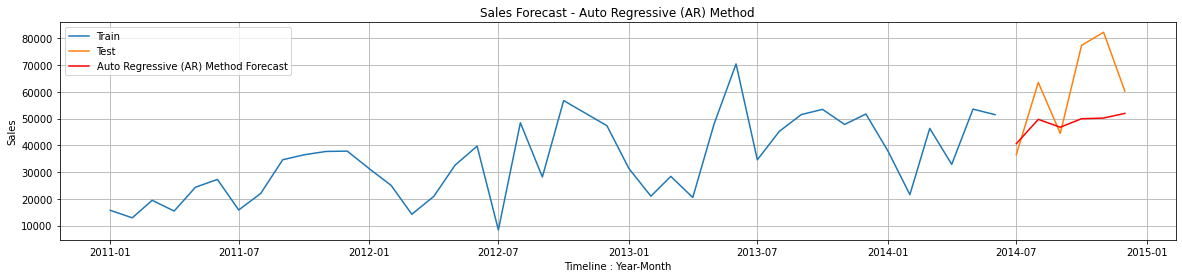

In [71]:
#Plotting the Auto Regressive (AR) Method Forecast with Train & Test data
plt.figure(figsize=(20,4))
plt.plot(sales_apac_train, label='Train')
plt.plot(sales_apac_test, label='Test')
plt.plot(forecast_AR['AR_forecast'][sales_apac_test.index.min():], label = 'Auto Regressive (AR) Method Forecast', c = 'r')
plt.title('Sales Forecast - Auto Regressive (AR) Method')
plt.xlabel('Timeline : Year-Month')
plt.ylabel('Sales')
plt.legend(loc = 'best')
plt.grid()
plt.show()

#####Calculate RMSE and MAPE

In [72]:
#Calculating RMSE & MAPE of the Auto Regressive (AR) Method
rmse = np.sqrt(mean_squared_error(sales_apac_test, forecast_AR['AR_forecast'][sales_apac_test.index.min():])).round()
mape = np.round(np.mean(np.abs(sales_apac_test['Sales'] - forecast_AR['AR_forecast'][sales_apac_test.index.min():])/sales_apac_test['Sales'])*100,2)

updatedresults = pd.DataFrame({'Method':'AR Method', 'RMSE':[rmse], 'MAPE':[mape]})
updatedresults = updatedresults[['Method', 'RMSE', 'MAPE']]
results = pd.concat([results, updatedresults])
results

,Method,RMSE,MAPE
0,Naive Method,18774.05,26.86
0,Simple Average Method,30846.00,38.18
0,Simple Average Method,18288.00,26.73
0,Simple Exponential Smoothing Method,22825.00,27.70
0,Holt's Exponential Smoothing Method,19474.00,26.12
0,Holt's Winters (Additive) Exponential Smoothin...,12566.00,17.32
0,Holt's Winters (Multiplicative) Exponential Sm...,10876.00,18.27
0,AR Method,18545.00,21.07


####3.4.2. Moving Average model(MA)

In [73]:
#Importing the ARIMA model from statsmodel and fitting the model
from statsmodels.tsa.arima_model import ARIMA
MAmodel = ARIMA(sales_boxcox_diff_train, order = (0,0,1))
MAmodel_fit = MAmodel.fit()
print(MAmodel_fit.params)

const      0.021646
ma.L1.y   -0.999927
dtype: float64


##### Recover original time series forecast

In [74]:
#Recovering the original time series
forecast_MA = sales_boxcox_diff.copy()
forecast_MA['MA_forecast_boxcox_diff'] = MAmodel_fit.predict(sales_boxcox_diff.index.min(), sales_boxcox_diff.index.max())
forecast_MA['MA_forecast_boxcox'] = forecast_MA['MA_forecast_boxcox_diff'].cumsum()
forecast_MA['MA_forecast_boxcox'] = forecast_MA['MA_forecast_boxcox'].add(sales_boxcox[0])
forecast_MA['MA_forecast'] = np.exp(forecast_MA['MA_forecast_boxcox'])

#####Plot train, test and forecast

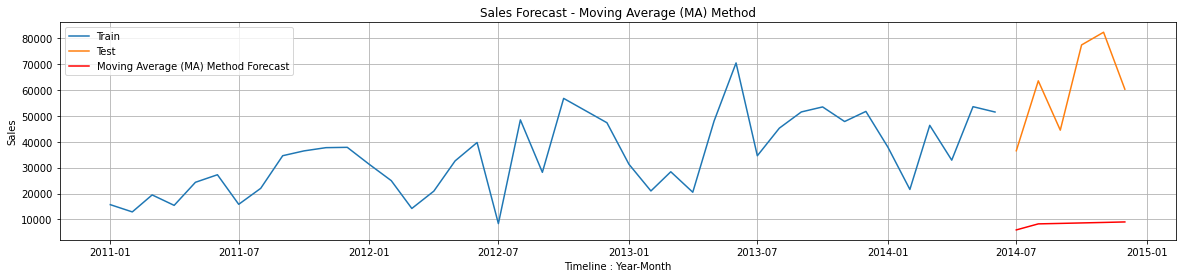

In [75]:
#Plotting the Moving Average (MA) Method Forecast with Train & Test data
plt.figure(figsize=(20,4))
plt.plot(sales_apac_train, label='Train')
plt.plot(sales_apac_test, label='Test')
plt.plot(forecast_MA['MA_forecast'][sales_apac_test.index.min():], label = 'Moving Average (MA) Method Forecast', c = 'r')
plt.title('Sales Forecast - Moving Average (MA) Method')
plt.xlabel('Timeline : Year-Month')
plt.ylabel('Sales')
plt.legend(loc = 'best')
plt.grid()
plt.show()

#####Calculate RMSE and MAPE

In [76]:
#Calculating RMSE & MAPE of the Moving Average (MA) Method
rmse = np.sqrt(mean_squared_error(sales_apac_test, forecast_MA['MA_forecast'][sales_apac_test.index.min():])).round()
mape = np.round(np.mean(np.abs(sales_apac_test['Sales'] - forecast_MA['MA_forecast'][sales_apac_test.index.min():])/sales_apac_test['Sales'])*100,2)

updatedresults = pd.DataFrame({'Method':'MA Method', 'RMSE':[rmse], 'MAPE':[mape]})
updatedresults = updatedresults[['Method', 'RMSE', 'MAPE']]
results = pd.concat([results, updatedresults])
results

,Method,RMSE,MAPE
0,Naive Method,18774.05,26.86
0,Simple Average Method,30846.00,38.18
0,Simple Average Method,18288.00,26.73
0,Simple Exponential Smoothing Method,22825.00,27.70
0,Holt's Exponential Smoothing Method,19474.00,26.12
0,Holt's Winters (Additive) Exponential Smoothin...,12566.00,17.32
0,Holt's Winters (Multiplicative) Exponential Sm...,10876.00,18.27
0,AR Method,18545.00,21.07
0,MA Method,54810.00,85.78


####3.4.3. Auto Regressive Moving Average model(ARMA)

In [77]:
#Importing the ARIMA model from statsmodel and fitting the model
from statsmodels.tsa.arima_model import ARIMA
ARMAmodel = ARIMA(sales_boxcox_diff_train, order = (1,0,1))
ARMAmodel_fit = ARMAmodel.fit()
print(ARMAmodel_fit.params)

const      0.021617
ar.L1.y    0.113284
ma.L1.y   -0.999942
dtype: float64


##### Recover original time series forecast

In [78]:
#Recovering the original time series
forecast_ARMA = sales_boxcox_diff.copy()
forecast_ARMA['ARMA_forecast_boxcox_diff'] = ARMAmodel_fit.predict(sales_boxcox_diff.index.min(), sales_boxcox_diff.index.max())
forecast_ARMA['ARMA_forecast_boxcox'] = forecast_ARMA['ARMA_forecast_boxcox_diff'].cumsum()
forecast_ARMA['ARMA_forecast_boxcox'] = forecast_ARMA['ARMA_forecast_boxcox'].add(sales_boxcox[0])
forecast_ARMA['ARMA_forecast'] = np.exp(forecast_ARMA['ARMA_forecast_boxcox'])

#####Plot train, test and forecast

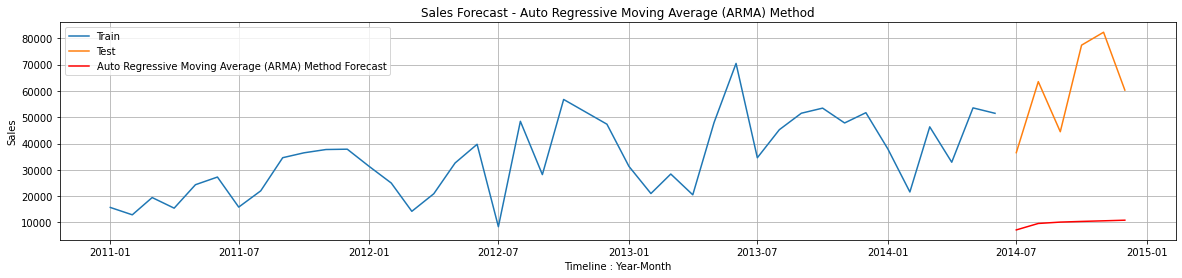

In [79]:
#Plotting the Auto Regressive Moving Average (ARMA) Method Forecast with Train & Test data
plt.figure(figsize=(20,4))
plt.plot(sales_apac_train, label='Train')
plt.plot(sales_apac_test, label='Test')
plt.plot(forecast_ARMA['ARMA_forecast'][sales_apac_test.index.min():], label = 'Auto Regressive Moving Average (ARMA) Method Forecast', c = 'r')
plt.title('Sales Forecast - Auto Regressive Moving Average (ARMA) Method')
plt.xlabel('Timeline : Year-Month')
plt.ylabel('Sales')
plt.legend(loc = 'best')
plt.grid()
plt.show()

#####Calculate RMSE and MAPE

In [80]:
#Calculating RMSE & MAPE of the Auto Regressive Moving Average (ARMA) Method
rmse = np.sqrt(mean_squared_error(sales_apac_test, forecast_ARMA['ARMA_forecast'][sales_apac_test.index.min():])).round()
mape = np.round(np.mean(np.abs(sales_apac_test['Sales'] - forecast_ARMA['ARMA_forecast'][sales_apac_test.index.min():])/sales_apac_test['Sales'])*100,2)

updatedresults = pd.DataFrame({'Method':'ARMA Method', 'RMSE':[rmse], 'MAPE':[mape]})
updatedresults = updatedresults[['Method', 'RMSE', 'MAPE']]
results = pd.concat([results, updatedresults])
results

,Method,RMSE,MAPE
0,Naive Method,18774.05,26.86
0,Simple Average Method,30846.00,38.18
0,Simple Average Method,18288.00,26.73
0,Simple Exponential Smoothing Method,22825.00,27.70
0,Holt's Exponential Smoothing Method,19474.00,26.12
0,Holt's Winters (Additive) Exponential Smoothin...,12566.00,17.32
0,Holt's Winters (Multiplicative) Exponential Sm...,10876.00,18.27
0,AR Method,18545.00,21.07
0,MA Method,54810.00,85.78
0,ARMA Method,53243.00,83.00


####3.4.4. Auto Regressive Integated Moving Average model(ARIMA)

`Note: As mentioned in problem statement, NOT plotting the PACF and the ACF values and using p=1, q=1 and d=1 for ARIMA model `

In [81]:
#Importing the ARIMA model from statsmodel and fitting the model
from statsmodels.tsa.arima_model import ARIMA
ARIMAmodel = ARIMA(sales_boxcox_train, order = (1,1,1))
ARIMAmodel_fit = ARIMAmodel.fit()
print(ARIMAmodel_fit.params)

const        0.022810
ar.L1.D.y    0.115879
ma.L1.D.y   -0.999964
dtype: float64


##### Recover original time series forecast

In [82]:
#Recovering the original time series
forecast_ARIMA = sales_boxcox_diff.copy()
forecast_ARIMA['ARIMA_forecast_boxcox_diff'] = ARIMAmodel_fit.predict(sales_boxcox_diff.index.min(), sales_boxcox_diff.index.max())
forecast_ARIMA['ARIMA_forecast_boxcox'] = forecast_ARIMA['ARIMA_forecast_boxcox_diff'].cumsum()
forecast_ARIMA['ARIMA_forecast_boxcox'] = forecast_ARIMA['ARIMA_forecast_boxcox'].add(sales_boxcox[0])
forecast_ARIMA['ARIMA_forecast'] = np.exp(forecast_ARIMA['ARIMA_forecast_boxcox'])

#####Plot train, test and forecast

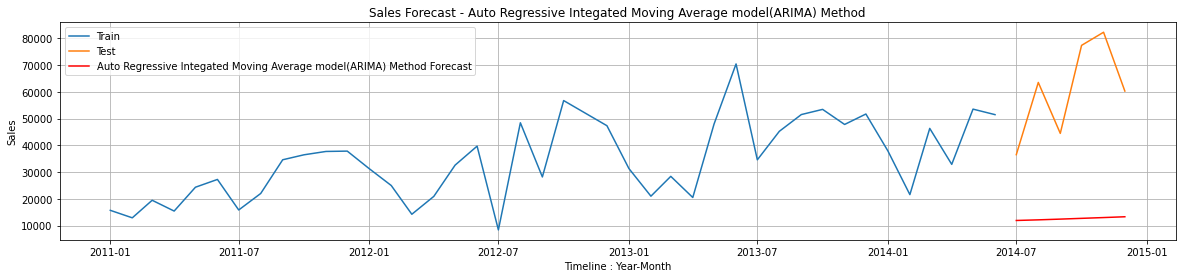

In [83]:
#Plotting the Auto Regressive Integated Moving Average model(ARIMA) Method Forecast with Train & Test data
plt.figure(figsize=(20,4))
plt.plot(sales_apac_train, label='Train')
plt.plot(sales_apac_test, label='Test')
plt.plot(forecast_ARIMA['ARIMA_forecast'][sales_apac_test.index.min():], label = 'Auto Regressive Integated Moving Average model(ARIMA) Method Forecast', c = 'r')
plt.title('Sales Forecast - Auto Regressive Integated Moving Average model(ARIMA) Method')
plt.xlabel('Timeline : Year-Month')
plt.ylabel('Sales')
plt.legend(loc = 'best')
plt.grid()
plt.show()

#####Calculate RMSE and MAPE

In [84]:
#Calculating RMSE & MAPE of the Auto Regressive Integated Moving Average model(ARIMA) Method
rmse = np.sqrt(mean_squared_error(sales_apac_test, forecast_ARIMA['ARIMA_forecast'][sales_apac_test.index.min():])).round()
mape = np.round(np.mean(np.abs(sales_apac_test['Sales'] - forecast_ARIMA['ARIMA_forecast'][sales_apac_test.index.min():])/sales_apac_test['Sales'])*100,2)

updatedresults = pd.DataFrame({'Method':'ARIMA Method', 'RMSE':[rmse], 'MAPE':[mape]})
updatedresults = updatedresults[['Method', 'RMSE', 'MAPE']]
results = pd.concat([results, updatedresults])
results

,Method,RMSE,MAPE
0,Naive Method,18774.05,26.86
0,Simple Average Method,30846.00,38.18
0,Simple Average Method,18288.00,26.73
0,Simple Exponential Smoothing Method,22825.00,27.70
0,Holt's Exponential Smoothing Method,19474.00,26.12
0,Holt's Winters (Additive) Exponential Smoothin...,12566.00,17.32
0,Holt's Winters (Multiplicative) Exponential Sm...,10876.00,18.27
0,AR Method,18545.00,21.07
0,MA Method,54810.00,85.78
0,ARMA Method,53243.00,83.00


####3.4.5. Seasonal Auto Regressive Integated Moving Average model(SARIMA)

`Note: As mentioned in problem statement, NOT plotting the PACF and the ACF values and using p=1, q=1 and d=1 for ARIMA model `

In [85]:
#Importing the SARIMAX model from statsmodel and fitting the model
from statsmodels.tsa.statespace.sarimax import SARIMAX
SARIMAmodel = SARIMAX(sales_boxcox_train, order = (1,1,1), seasonal_order = (1,1,1,12))
SARIMAmodel_fit = SARIMAmodel.fit()
print(SARIMAmodel_fit.params)

ar.L1      -0.101234
ma.L1      -0.995043
ar.S.L12   -0.392469
ma.S.L12   -0.988410
sigma2      0.047321
dtype: float64


##### Recover original time series forecast

In [86]:
#Recovering the original time series
forecast_SARIMA = sales_boxcox_diff.copy()
forecast_SARIMA['SARIMA_forecast_boxcox'] = SARIMAmodel_fit.predict(sales_boxcox_diff.index.min(), sales_boxcox_diff.index.max())
forecast_SARIMA['SARIMA_forecast'] = np.exp(forecast_SARIMA['SARIMA_forecast_boxcox'])

#####Plot train, test and forecast

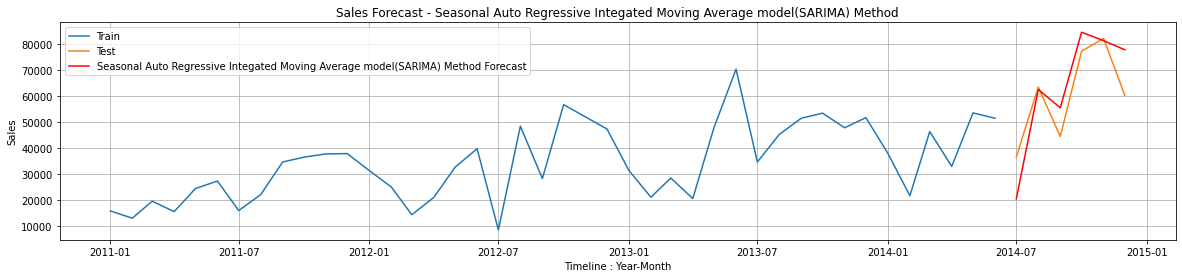

In [87]:
#Plotting the Seasonal Auto Regressive Integated Moving Average model(SARIMA) Method Forecast with Train & Test data
plt.figure(figsize=(20,4))
plt.plot(sales_apac_train, label='Train')
plt.plot(sales_apac_test, label='Test')
plt.plot(forecast_SARIMA['SARIMA_forecast'][sales_apac_test.index.min():], label = 'Seasonal Auto Regressive Integated Moving Average model(SARIMA) Method Forecast', c = 'r')
plt.title('Sales Forecast - Seasonal Auto Regressive Integated Moving Average model(SARIMA) Method')
plt.xlabel('Timeline : Year-Month')
plt.ylabel('Sales')
plt.legend(loc = 'best')
plt.grid()
plt.show()

#####Calculate RMSE and MAPE

In [88]:
#Calculating RMSE & MAPE of the Seasonal Auto Regressive Integated Moving Average model(SARIMA) Method
rmse = np.sqrt(mean_squared_error(sales_apac_test, forecast_SARIMA['SARIMA_forecast'][sales_apac_test.index.min():])).round()
mape = np.round(np.mean(np.abs(sales_apac_test['Sales'] - forecast_SARIMA['SARIMA_forecast'][sales_apac_test.index.min():])/sales_apac_test['Sales'])*100,2)

updatedresults = pd.DataFrame({'Method':'SARIMA Method', 'RMSE':[rmse], 'MAPE':[mape]})
updatedresults = updatedresults[['Method', 'RMSE', 'MAPE']]
results = pd.concat([results, updatedresults])
results

,Method,RMSE,MAPE
0,Naive Method,18774.05,26.86
0,Simple Average Method,30846.00,38.18
0,Simple Average Method,18288.00,26.73
0,Simple Exponential Smoothing Method,22825.00,27.70
0,Holt's Exponential Smoothing Method,19474.00,26.12
0,Holt's Winters (Additive) Exponential Smoothin...,12566.00,17.32
0,Holt's Winters (Multiplicative) Exponential Sm...,10876.00,18.27
0,AR Method,18545.00,21.07
0,MA Method,54810.00,85.78
0,ARMA Method,53243.00,83.00


##**4. Best Models as per MAPE value**

###**4.1 Sorting the results in ascending order of MAPE values**

In [89]:
#final forecast results
final_forecast_results = results.sort_values(by = 'MAPE')
final_forecast_results

,Method,RMSE,MAPE
0,Holt's Winters (Additive) Exponential Smoothin...,12566.00,17.32
0,Holt's Winters (Multiplicative) Exponential Sm...,10876.00,18.27
0,SARIMA Method,11165.00,18.37
0,AR Method,18545.00,21.07
0,Holt's Exponential Smoothing Method,19474.00,26.12
0,Simple Average Method,18288.00,26.73
0,Naive Method,18774.05,26.86
0,Simple Exponential Smoothing Method,22825.00,27.70
0,Simple Average Method,30846.00,38.18
0,ARIMA Method,50761.00,77.66


##**5. Conclusion**

By Looking at the "final forecast results" above, it is evident that out of all forecasting methods, the Holt Winter’s Additive Method, Holt Winter’s Multiplicative Method, and SARIMA Method have performed exceptionally well. 

We can say that we expected the same, as the decomposition of series shown that it contained trend & seasonality and we understood the same during the module that Holt Winter’s smoothing method & SARIMA method can handle both trend & seasonality as compared to other smoothing or AR techniques.


===== X ===== X ===== X ===== X ===== X ===== X ===== End of Assigment ===== X ===== X ===== X ===== X ===== X ===== 